## This is the Collaberative Filtering Notebook 

First step is to import the item data and the ratings data into a Pandas DataFrame

In [1]:
import numpy as np, pandas as pd

In [2]:
reviews = pd.read_csv('data/ratings.csv')

In [3]:
reviews.head()

,userId,itemID,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
items = pd.read_csv('data/items.csv')
items.head()

,itemID,itemTitle,Attributes
0,1,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
1,2,Item 2,Attribute1|Attribute3|Attribute5
2,3,Item 3,Attribute4|Attribute7
3,4,Item 4,Attribute4|Attribute6|Attribute7
4,5,Item 5,Attribute4


In [5]:
reviews = pd.merge(reviews,items,on='itemID')
reviews.head()

,userId,itemID,rating,timestamp,itemTitle,Attributes
0,1,1,4.0,964982703,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
1,5,1,4.0,847434962,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
2,7,1,4.5,1106635946,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
3,15,1,2.5,1510577970,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
4,17,1,4.5,1305696483,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...


rename the column names

In [6]:
reviews.rename(columns={"userId": "UserID", "itemID": "ItemID"}, inplace=True)

This is the formula we will use WeightedRating(WR)=(vv+m⋅R)+(mv+m⋅C)

In the above equation,

-v is the number of votes for the movie;

-m is the minimum votes required to be listed in the chart;

-R is the average rating of the movie;

-C is the mean vote across the whole report.

Using mongo DB to store the attribute information may be better as the JSON can be easily parsed

# Part 1 : Convert to a Matrix Array using Numpy

In [7]:
ratingsmatrix = reviews.pivot(index='UserID', columns='ItemID', values='rating')

In [8]:
ratingsmatrix.head(20)

ItemID,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
UserID,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,3.0,5.0,4.0,4.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As written about in the Literature Review, Item-to-Item collaborative filtering will be used to determine similarity, as the number of Customers is much larger than the number of items, and Users ratings are dynamic, whereas the attributes of the items rarely change. The two items can be represented as a vector, and the similarity score can be calculated using the formula cos( θ ) =( x . i ) / ( | x | | i | ). 

The ratings need to be normailized before use

In [9]:
#ratingsmatrix.groupby('UserID').transform(lambda x: x - x.mean())

In [10]:
ratingsmatrix

ItemID,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
UserID,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


problem at this point, hard to verify the results of normalizing the ratings as all appear to be 0.0

## Extra Work - Analysis of the Dataset

In [11]:
split_value = int(len(reviews) * 0.80)
train_data = reviews[:split_value]
test_data = reviews[split_value:]

In [12]:
train_data.shape

(80668, 6)

In [13]:
test_data.shape

(20168, 6)

In [14]:
test_data.head()

,UserID,ItemID,rating,timestamp,itemTitle,Attributes
80668,368,3769,3.0,975829254,Item 2822,Attribute8
80669,57,3773,1.0,965797677,Item 2825,Attribute4
80670,294,3773,3.0,966596414,Item 2825,Attribute4
80671,57,3774,1.0,965797855,Item 2826,Attribute4|Attribute6|Attribute7
80672,294,3774,1.0,966597088,Item 2826,Attribute4|Attribute6|Attribute7


Count number of ratings in the training data set:

### Import graph libraries 

In [15]:
import seaborn as sns
import os
import random
import matplotlib
import matplotlib.pyplot as plt

<ipython-input-16-571d072c4c39>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


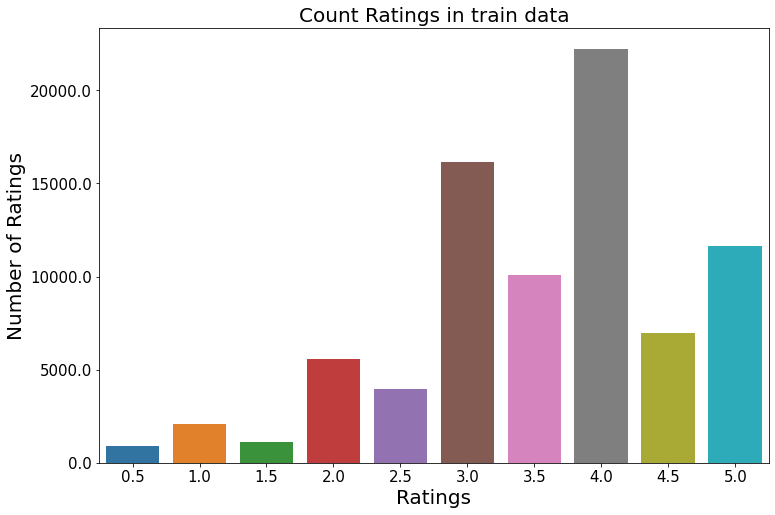

In [16]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=train_data)
ax.set_yticklabels(
    [num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

Find the number of rated items per **user**:

In [17]:
no_rated_items_per_user = train_data.groupby(by = "UserID")["rating"].count().sort_values(ascending = False)
no_rated_items_per_user.head()

UserID
414    1687
599    1421
474    1117
448    1028
68     1008
Name: rating, dtype: int64

can see in this that User ID 414 has made the most reviews in the training data set

Find the number of rated items per **Item**:

In [18]:
no_ratings_per_item = train_data.groupby(by = "ItemID")["rating"].count().sort_values(ascending = False)
no_ratings_per_item.head()

ItemID
356     329
318     317
296     307
593     279
2571    278
Name: rating, dtype: int64

Item ID 356 has the highest number of ratings in the training dataset

In [19]:
from scipy import sparse
def get_user_item_sparse_matrix(df):
    sparse_data = sparse.csr_matrix((df.rating, (df.UserID, df.ItemID)))
    return sparse_data

In [20]:
train_sparse_data = get_user_item_sparse_matrix(train_data)
train_sparse_data

<611x190184 sparse matrix of type '<class 'numpy.float64'>'
	with 80668 stored elements in Compressed Sparse Row format>

In [21]:
test_sparse_data = get_user_item_sparse_matrix(test_data)

In [22]:
global_average_rating = train_sparse_data.sum()/train_sparse_data.count_nonzero()
print("Global Average Rating: {}".format(global_average_rating))

Global Average Rating: 3.5611332870531065


## Cold Start

get average rating for a user

In [23]:
def get_average_rating(sparse_matrix, is_user):
    ax = 1 if is_user else 0
    sum_of_ratings = sparse_matrix.sum(axis = ax).A1  
    no_of_ratings = (sparse_matrix != 0).sum(axis = ax).A1 
    rows, cols = sparse_matrix.shape
    average_ratings = {i: sum_of_ratings[i]/no_of_ratings[i] for i in range(rows if is_user else cols) if no_of_ratings[i] != 0}
    return average_ratings

Average Rating User

In [24]:
average_rating_user = get_average_rating(train_sparse_data, True)
average_rating_user

{1: 4.366379310344827,
 2: 3.9482758620689653,
 3: 2.4358974358974357,
 4: 3.5555555555555554,
 5: 3.6363636363636362,
 6: 3.4936305732484074,
 7: 3.2302631578947367,
 8: 3.574468085106383,
 9: 3.260869565217391,
 10: 3.2785714285714285,
 11: 3.78125,
 12: 4.390625,
 13: 3.6451612903225805,
 14: 3.3958333333333335,
 15: 3.448148148148148,
 16: 3.7244897959183674,
 17: 4.20952380952381,
 18: 3.7320717131474104,
 19: 2.607396870554765,
 20: 3.590909090909091,
 21: 3.260722347629797,
 22: 2.5714285714285716,
 23: 3.6487603305785123,
 24: 3.65,
 25: 4.8076923076923075,
 26: 3.238095238095238,
 27: 3.5481481481481483,
 28: 3.020175438596491,
 29: 4.1419753086419755,
 30: 4.735294117647059,
 31: 3.92,
 32: 3.7549019607843137,
 33: 3.7884615384615383,
 34: 3.4186046511627906,
 35: 4.086956521739131,
 36: 2.6333333333333333,
 37: 4.142857142857143,
 38: 3.217948717948718,
 39: 4.0,
 40: 3.766990291262136,
 41: 3.2534562211981566,
 42: 3.565909090909091,
 43: 4.552631578947368,
 44: 3.354166666

Average Rating Item

In [25]:
avg_rating_item = get_average_rating(train_sparse_data, False)
avg_rating_item

{1: 3.9209302325581397,
 2: 3.4318181818181817,
 3: 3.2596153846153846,
 4: 2.357142857142857,
 5: 3.0714285714285716,
 6: 3.946078431372549,
 7: 3.185185185185185,
 8: 2.875,
 10: 3.496212121212121,
 11: 3.6714285714285713,
 12: 2.4210526315789473,
 13: 3.125,
 15: 3.0,
 16: 3.926829268292683,
 17: 3.7761194029850746,
 18: 3.7,
 19: 2.727272727272727,
 21: 3.49438202247191,
 22: 3.2222222222222223,
 23: 3.125,
 24: 3.125,
 25: 3.625,
 26: 3.5,
 27: 3.3333333333333335,
 28: 4.2272727272727275,
 29: 4.0131578947368425,
 31: 3.1842105263157894,
 32: 3.983050847457627,
 34: 3.65234375,
 36: 3.8358208955223883,
 38: 2.125,
 39: 3.293269230769231,
 41: 3.7,
 43: 3.1875,
 44: 2.5434782608695654,
 45: 3.3125,
 46: 3.066666666666667,
 47: 3.9753694581280787,
 48: 3.1470588235294117,
 50: 4.237745098039215,
 52: 3.4642857142857144,
 54: 2.3333333333333335,
 57: 3.0625,
 58: 4.027027027027027,
 60: 3.235294117647059,
 61: 3.75,
 62: 3.70625,
 64: 2.2,
 65: 2.532258064516129,
 66: 2.5,
 69: 3.775

In [26]:
total_users = len(np.unique(reviews["UserID"]))
train_users = len(average_rating_user)
uncommonUsers = total_users - train_users
                  
print("Total no. of Users = {}".format(total_users))
print("No. of Users in train data= {}".format(train_users))
print("No. of Users not present in train data = {}({}%)".format(uncommonUsers, np.round((uncommonUsers/total_users)*100), 2))

Total no. of Users = 610
No. of Users in train data= 610
No. of Users not present in train data = 0(0.0%)


In [27]:
total_items = len(np.unique(reviews["ItemID"]))
train_items = len(avg_rating_item)
uncommonitems = total_items - train_items
                  
print("Total no. of Items = {}".format(total_items))
print("No. of Items in train data= {}".format(train_items))
print("No. of Items not present in train data = {}({}%)".format(uncommonitems, np.round((uncommonitems/total_items)*100), 2))

Total no. of Items = 9724
No. of Items in train data= 3046
No. of Items not present in train data = 6678(69.0%)


In [28]:
reviews

,UserID,ItemID,rating,timestamp,itemTitle,Attributes
0,1,1,4.0,964982703,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
1,5,1,4.0,847434962,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
2,7,1,4.5,1106635946,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
3,15,1,2.5,1510577970,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
4,17,1,4.5,1305696483,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Item 9326,Attribute8|Attribute10
100832,610,160527,4.5,1479544998,Item 9331,Attribute8|Attribute9|Attribute6
100833,610,160836,3.0,1493844794,Item 9343,Attribute8|Attribute6|Attribute10
100834,610,163937,3.5,1493848789,Item 9390,Attribute13|Attribute10


## Normalizing the Ratings again
the first part is to normalize the ratings around 0
Using the Training Set to replicate using the ratingsmatrix created above

In [29]:
ratingsmatrix

ItemID,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
UserID,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
train_data

,UserID,ItemID,rating,timestamp,itemTitle,Attributes
0,1,1,4.0,964982703,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
1,5,1,4.0,847434962,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
2,7,1,4.5,1106635946,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
3,15,1,2.5,1510577970,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
4,17,1,4.5,1305696483,Item 1,Attribute1|Attribute2|Attribute3|Attribute4|At...
...,...,...,...,...,...,...
80663,606,3632,4.0,1171501155,Item 2708,Attribute4|Attribute9
80664,57,3643,4.0,969754552,Item 2717,Attribute8|Attribute6|Attribute16
80665,368,3643,3.0,971275047,Item 2717,Attribute8|Attribute6|Attribute16
80666,57,3769,4.0,965799383,Item 2822,Attribute8


In [45]:
trainmat = train_data.pivot(index='UserID', columns='itemTitle', values='rating')
trainmat

itemTitle,Item 1,Item 10,Item 100,Item 1000,Item 1001,Item 1002,Item 1003,Item 1006,Item 101,Item 1010,...,Item 985,Item 987,Item 988,Item 989,Item 99,Item 991,Item 993,Item 996,Item 997,Item 998
UserID,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,3.0,...,4.5,NaN,NaN,NaN,3.5,4.0,4.0,NaN,NaN,3.5
607,4.0,NaN,2.0,NaN,NaN,NaN,4.0,4.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
608,2.5,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,2.0,NaN,3.0,4.0,NaN,NaN,NaN,NaN


replace the NaN's in the DF with 0

In [32]:
#trainmat.fillna(0.0, inplace=True)

In [46]:
n_users = train_data.UserID.unique().shape[0]
n_items = train_data.ItemID.unique().shape[0]
print('The number of users is ' + str(n_users) + ' and the number of items is ' + str(n_items))

The number of users is 610 and the number of items is 3046


The aim here is to normalising the scores and subtracting the mean of all a users ratings from a users score. 

This is to compare the ratings given, all users rated the first item a 4, so following normalisation should all be different but arent

The idea is that if a user who normally rates something highly rates something low then the rating should be negative, and that a rating of 0 should remain 0

In [48]:
#Fetch Ratings for Item 
Test_item_rating = trainmat['Item 99']
Test_item_rating

UserID
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    3.5
607    NaN
608    3.0
609    NaN
610    5.0
Name: Item 99, Length: 610, dtype: float64

In [49]:
# Finding the correlation with different Items 
similar_to_item = trainmat.corrwith(Test_item_rating)
similar_to_item

c:\users\alexm\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\alexm\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


itemTitle
Item 1       0.064991
Item 10     -0.353823
Item 100     0.049555
Item 1000   -0.092803
Item 1001    0.470610
               ...   
Item 991    -0.017961
Item 993     0.134043
Item 996     0.132089
Item 997     0.168297
Item 998     0.396590
Length: 3046, dtype: float64

In [52]:
similar_to_item.sort_values(ascending=False)

itemTitle
Item 573     1.0
Item 7409    1.0
Item 1886    1.0
Item 2617    1.0
Item 7080    1.0
            ... 
Item 9703    NaN
Item 9709    NaN
Item 9710    NaN
Item 9714    NaN
Item 9725    NaN
Length: 3046, dtype: float64

In [65]:
#Select Item 99 to see the attributes
reviews[reviews['itemTitle'] == 'Item 99']

,UserID,ItemID,rating,timestamp,itemTitle,Attributes
48431,16,111,4.5,1377477446,Item 99,Attribute9|Attribute6|Attribute10
48432,17,111,4.0,1326943208,Item 99,Attribute9|Attribute6|Attribute10
48433,18,111,4.0,1458516249,Item 99,Attribute9|Attribute6|Attribute10
48434,40,111,5.0,832059116,Item 99,Attribute9|Attribute6|Attribute10
48435,41,111,2.0,1459367437,Item 99,Attribute9|Attribute6|Attribute10
...,...,...,...,...,...,...
48530,603,111,5.0,953926758,Item 99,Attribute9|Attribute6|Attribute10
48531,604,111,4.0,832079983,Item 99,Attribute9|Attribute6|Attribute10
48532,606,111,3.5,1171831405,Item 99,Attribute9|Attribute6|Attribute10
48533,608,111,3.0,1147544014,Item 99,Attribute9|Attribute6|Attribute10


In [66]:
reviews[reviews['itemTitle'] == 'Item 573']

,UserID,ItemID,rating,timestamp,itemTitle,Attributes
33164,6,700,4.0,845556147,Item 573,Attribute4
33165,294,700,3.0,966596297,Item 573,Attribute4
33166,307,700,1.5,1186085086,Item 573,Attribute4
33167,414,700,4.0,961438086,Item 573,Attribute4
33168,448,700,3.0,1019127943,Item 573,Attribute4
33169,555,700,4.0,978746838,Item 573,Attribute4
33170,600,700,3.0,1237710276,Item 573,Attribute4


## SUBRACT THE RATING FROM THE MEAN NOT THE MEAN FROM THE RATING 

In [ ]:
new_matrix.shape

In [ ]:
trainmat.shape

In [ ]:
new_matrix.max()

In [ ]:
plt.figure(figsize=(10,4))
new_matrix.hist(bins=70)

## SCRAP CELLS

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(trainmat, metric='cosine')
item_similarity = pairwise_distances(trainmat, metric='cosine')

Item-Item Collaborative Filtering: “Users who liked this item also liked"

The similarity values between items in Item-Item Collaborative Filtering are measured by observing all the users who have rated both items.
For User-Item Collaborative Filtering the similarity values between users are measured by observing all the items that are rated by both users.

In [ ]:
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

x = trainmat.values
X_scaled = scale(x, -1, 1)
print(X_scaled)

#Doesnt work as 0 is normalized to -1 - stems from the ratings being from 0 to 5 